# Proyek Analisis Data: E-Bike
- **Nama:** Christoforus Stanislaus
- **Email:** christoforusstanislaus11@gmail.com
- **ID Dicoding:** christoforus

## Menentukan Pertanyaan Bisnis

- Bagaimana faktor eksternal (musim, temperatur, kelembapan, kecepatan angin) memengaruhi jumlah pengguna sepeda?
- Bagaimana jumlah pengguna sepeda pada 1 tahun tersebut, kebiasaan pengguna casual dan registered?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Di sini kita dapat memanggil data dalam bentuk csv

### Assessing Data

**Asess data day.csv**

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dapat dilihat bahwa semua jumlah di day.csv memiliki angka yang sama dengan kata lain tidak terdapat missing value. Di sisi lain, terdapat kesalahan datatype untuk dtetime. Pada data day.csv ini juga tidak terdapat data duplikat. Jika dilihat saat menggunakan describe, dapat diperhatikan bahwa data yang tersedia dapat dikategorikan baik.
- Dengan demikian, pada data day.csv ini sudah baik sehingga tidak diperlukanya melakukan dropping atau interpolasi kecuali untuk mengganti datatype dari dtetime

**Asess data hour.csv**

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
date_counts = hour_df['dteday'].value_counts()
date_counts[date_counts < 24]

,count
dteday,
2011-01-05,23
2011-02-09,23
2011-10-19,23
2011-01-06,23
2012-11-29,23
...,...
2011-01-26,16
2011-01-18,12
2012-10-30,11


**Insight:**
- Dapat dilihat bahwa sama seperti day.csv,  hour.csv memiliki jumlah(count) data yang sama untuk setiap datanya dan tidak terdapat missing value. Di sisi lain, terdapat kesalahan datatype untuk dtetime. Pada data hour.csv ini juga tidak terdapat data duplikat. Jika dilihat jumlah count pada setiap harinya, ada beberapa hari yang memiliki jumlah count dibawah 24, ini berarti ada beberapa hari yang tidak mencakup penuh waktunya. Karena cakupan waktunya harusnya 24 jam maka akan terdapat 24 anggota yaitu (0, 1, 2, ..., 23) dengan 0 mencakup pukul 00.00 - 00.59, lalu 1 mencakup pukul 01.00 - 01.59, dst.
- Dengan demikian, pada data hour.csv dapat dilakukan dropping untuk beberapa hari yang kurang data

### Cleaning Data

**Penggantian data type, penggantian angka pada normalized number pada day_df**


In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
day_df['temp'] = day_df['temp'] * 41
day_df['atemp'] = day_df['atemp'] * 50
day_df['hum'] = day_df['hum'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67
day_df['season'] = day_df['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [18]:
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,Springer,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,Springer,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2011-01-08,Springer,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2011-01-09,Springer,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2011-01-10,Springer,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


**Penggantian data type,drop data dan penggantian normalized number pada hour_df**

In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [20]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [21]:
date_counts = hour_df['dteday'].value_counts()
dates_to_drop = date_counts[date_counts < 24].index
hour_df = hour_df[~hour_df['dteday'].isin(dates_to_drop)]

In [22]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15720 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     15720 non-null  int64         
 1   dteday      15720 non-null  datetime64[ns]
 2   season      15720 non-null  int64         
 3   yr          15720 non-null  int64         
 4   mnth        15720 non-null  int64         
 5   hr          15720 non-null  int64         
 6   holiday     15720 non-null  int64         
 7   weekday     15720 non-null  int64         
 8   workingday  15720 non-null  int64         
 9   weathersit  15720 non-null  int64         
 10  temp        15720 non-null  float64       
 11  atemp       15720 non-null  float64       
 12  hum         15720 non-null  float64       
 13  windspeed   15720 non-null  float64       
 14  casual      15720 non-null  int64         
 15  registered  15720 non-null  int64         
 16  cnt         15720 non-null 

In [23]:
hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67
hour_df['season'] = hour_df['season'].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [24]:
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,Springer,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,Springer,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,Springer,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,Springer,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0000,0,1,1
5,6,2011-01-01,Springer,0,1,5,0,6,0,2,9.84,12.880,75.0,6.0032,0,1,1
6,7,2011-01-01,Springer,0,1,6,0,6,0,1,9.02,13.635,80.0,0.0000,2,0,2
7,8,2011-01-01,Springer,0,1,7,0,6,0,1,8.20,12.880,86.0,0.0000,1,2,3
8,9,2011-01-01,Springer,0,1,8,0,6,0,1,9.84,14.395,75.0,0.0000,1,7,8
9,10,2011-01-01,Springer,0,1,9,0,6,0,1,13.12,17.425,76.0,0.0000,8,6,14


**Insight:**
- Karena adanya kesalahan klasifikasi data type, maka pada proses cleaning ini saya mengganti data type dari datetime yang awalnya object diubah menjadi datetime
- Lalu melakukan drop untuk beberapa hari di hour.csv yang mempunyai data kurang dari 24 jam

## Exploratory Data Analysis (EDA)

### Explore day_df

In [25]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
200,201,2011-07-20,Fall,0,7,0,3,1,1,31.501653,37.34250,70.7083,7.625739,644,3688,4332
460,461,2012-04-05,Summer,1,4,0,4,1,1,17.835000,21.55815,37.4167,14.708443,1192,5265,6457
366,367,2012-01-02,Springer,1,1,1,1,0,1,11.194763,12.61520,38.1304,22.087555,244,1707,1951
630,631,2012-09-22,Fall,1,9,0,6,0,1,26.650000,30.52440,64.6667,19.000061,2512,5883,8395
344,345,2011-12-11,Winter,0,12,0,0,0,1,9.054153,12.65770,49.0000,4.458294,377,2366,2743


In [26]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Clustering berdasarkan hari holiday atau tidak**

In [27]:
day_df.groupby(by="holiday").agg({"casual" : 'sum', "registered" : 'sum', "cnt" : 'sum', 'dteday':'count'})

,casual,registered,cnt,dteday
holiday,,,,
0,597658,2616586,3214244,710
1,22359,56076,78435,21


**Clustering berdasarkan musim**



In [28]:
day_df.groupby(by="season").agg({"casual" : 'sum', "registered" : 'sum', "cnt" : 'sum'})

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Springer,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


**Clustering berdasarkan temp**



In [29]:
day_df.groupby(pd.cut(day_df['temp'], bins=10)).agg({"cnt": "sum"})

<ipython-input-29-6b6259bb6261>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(pd.cut(day_df['temp'], bins=10)).agg({"cnt": "sum"})


,cnt
temp,
"(2.391, 5.715]",9707
"(5.715, 9.005]",57853
"(9.005, 12.296]",250141
"(12.296, 15.586]",361350
"(15.586, 18.876]",378145
"(18.876, 22.167]",415198
"(22.167, 25.457]",541617
"(25.457, 28.748]",559325
"(28.748, 32.038]",594713


**Clustering berdasarkan 10 hari dengan count total rental terbanyak**

In [30]:
day_df.sort_values(by='cnt', ascending=False).head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,Fall,1,9,0,6,0,1,24.941653,29.29335,50.1667,16.583907,3160,5554,8714
637,638,2012-09-29,Winter,1,9,0,6,0,1,22.242500,26.51480,54.2917,15.249468,2589,5966,8555
630,631,2012-09-22,Fall,1,9,0,6,0,1,26.650000,30.52440,64.6667,19.000061,2512,5883,8395
447,448,2012-03-23,Summer,1,3,0,5,1,2,24.668347,28.50335,69.4167,7.792100,2469,5893,8362
504,505,2012-05-19,Summer,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884,8294
617,618,2012-09-09,Fall,1,9,0,0,0,1,25.010000,28.94625,54.7500,15.041232,2570,5657,8227
571,572,2012-07-25,Fall,1,7,0,3,1,1,29.690847,32.70270,45.0000,11.041600,1383,6790,8173
629,630,2012-09-21,Fall,1,9,0,5,1,1,24.565847,28.59855,66.8750,10.333343,1250,6917,8167
643,644,2012-10-05,Winter,1,10,0,5,1,1,25.215000,29.00935,62.7500,7.125450,1516,6640,8156
518,519,2012-06-02,Summer,1,6,0,6,0,1,23.916653,28.31440,54.9167,12.499654,2795,5325,8120


**Insight:**
- dari data di atas diperoleh bahwa secara jumlah, tetap lebih banyak pengguna pada hari biasa daripada hari libur. Jika dirata-ratakan untuk setiap harinya, maka pada hari biasa mencapai 4527 renter per hari, sedangkan pada hari libur (holiday) hanya berada di angka 3735 renter per hari
- Jika dilihat berdasarkan season, maka Fall berada di peringkat pertama dengan lebih dari 1 juta renter pada musim itu lalu dilanjut dengan summer, winter, dan springer
- Meninjau dari segi temperatur, maka partisi temperatur dengan jumlah renter terbanyak berada di 28.7°C - 32°C dengan lebih dari 590 ribu pengguna. Lalu dilanjut dengan 25.4°C - 28.7°C dengan hampir 560 ribu pengguna. Terakhir, berada pada suhu 22.2°C - 25.4°C dengan lebih dari 540 ribu pengguna.
- Kemudian, saat di sort berdasarkan 10 hari dengan renter terbanyak, 5 diantaranya berasal dari bulan September, yaitu pada saat fall

### Explore hour_df

:**Mengambil sebarang 10 sample dari hour_df**

In [31]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8731,8732,2012-01-04,Springer,1,1,15,0,3,1,2,7.38,7.575,37.0,22.0028,9,81,90
7034,7035,2011-10-25,Winter,0,10,17,0,2,1,1,22.96,26.515,37.0,7.0015,68,517,585
4474,4475,2011-07-10,Fall,0,7,8,0,0,0,1,29.52,34.090,66.0,0.0000,27,65,92
16080,16081,2012-11-07,Winter,1,11,17,0,3,1,2,13.12,14.395,53.0,26.0027,16,501,517
7489,7490,2011-11-13,Winter,0,11,16,0,0,0,2,22.14,25.760,28.0,26.0027,93,226,319
1383,1384,2011-03-02,Springer,0,3,22,0,3,1,1,12.30,12.880,26.0,36.9974,4,44,48
11512,11513,2012-04-29,Summer,1,4,21,0,0,0,1,21.32,25.000,48.0,8.9981,65,139,204
10939,10940,2012-04-05,Summer,1,4,23,0,4,1,1,16.40,20.455,50.0,8.9981,12,124,136
11454,11455,2012-04-27,Summer,1,4,11,0,5,1,1,18.04,21.970,38.0,22.0028,47,186,233
17014,17015,2012-12-16,Winter,1,12,17,0,0,0,2,15.58,19.695,82.0,7.0015,29,214,243


**Melihat statistik dari tiap kolom data**

In [32]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15720.000000,15720,15720,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9186.403817,2012-01-22 23:59:59.999999744,NaN,0.534351,6.844275,11.500000,0.025954,3.073282,0.676336,1.413104,21.197417,24.685532,62.982634,12.571099,38.122328,161.432824,199.555153
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.760000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,5036.750000,2011-08-02 00:00:00,NaN,0.000000,4.000000,5.750000,0.000000,1.000000,0.000000,1.000000,14.760000,17.425000,48.000000,7.001500,5.000000,37.000000,44.000000
50%,9254.500000,2012-01-26 00:00:00,NaN,1.000000,7.000000,11.500000,0.000000,3.000000,1.000000,1.000000,21.320000,25.000000,63.000000,11.001400,19.000000,126.000000,155.000000
75%,13345.250000,2012-07-15 00:00:00,NaN,1.000000,10.000000,17.250000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,52.000000,229.000000,296.000000
max,17379.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


**Clustering berdasarkan 10 jam dengan count total rental terbanyak**

In [33]:
hour_df.sort_values(by='cnt', ascending=False).head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,Fall,1,9,18,0,3,1,1,27.06,31.060,44.0,16.9979,91,886,977
14964,14965,2012-09-20,Fall,1,9,17,0,4,1,1,26.24,31.060,50.0,15.0013,91,885,976
14748,14749,2012-09-11,Fall,1,9,17,0,2,1,1,28.70,31.820,28.0,0.0000,168,802,970
14725,14726,2012-09-10,Fall,1,9,18,0,1,1,1,25.42,31.060,35.0,19.9995,111,857,968
15084,15085,2012-09-25,Winter,1,9,17,0,2,1,1,27.06,31.060,39.0,19.0012,107,860,967
15780,15781,2012-10-24,Winter,1,10,17,0,3,1,1,27.06,31.060,47.0,0.0000,87,876,963
10622,10623,2012-03-23,Summer,1,3,17,0,5,1,2,29.52,32.575,42.0,11.0014,264,693,957
15108,15109,2012-09-26,Winter,1,9,17,0,3,1,1,30.34,33.335,48.0,19.9995,77,876,953
15444,15445,2012-10-10,Winter,1,10,17,0,3,1,1,23.78,27.275,43.0,15.0013,91,857,948
15588,15589,2012-10-16,Winter,1,10,17,0,2,1,1,21.32,25.000,39.0,12.9980,104,839,943


**Clustering berdasarkan jumlah rental pada setiap jamnya**

In [34]:
hour_df.groupby(pd.cut(hour_df['hr'], bins=range(-1, 24, 1), include_lowest=False)).agg({"cnt": "sum"})

<ipython-input-34-4afa538f35d3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(pd.cut(hour_df['hr'], bins=range(-1, 24, 1), include_lowest=False)).agg({"cnt": "sum"})


,cnt
hr,
"(-1, 0]",37742
"(0, 1]",23385
"(1, 2]",15888
"(2, 3]",7887
"(3, 4]",4290
"(4, 5]",13675
"(5, 6]",52648
"(6, 7]",147099
"(7, 8]",247108


**Clustering berdasarkan temperatur**



In [35]:
hour_df.groupby(pd.cut(hour_df['temp'], bins=10)).agg({"cnt": "sum"})

<ipython-input-35-54e84c5cf2c8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(pd.cut(hour_df['temp'], bins=10)).agg({"cnt": "sum"})


,cnt
temp,
"(0.78, 4.838]",2423
"(4.838, 8.856]",41214
"(8.856, 12.874]",191073
"(12.874, 16.892]",388224
"(16.892, 20.91]",406301
"(20.91, 24.928]",555374
"(24.928, 28.946]",701366
"(28.946, 32.964]",619702
"(32.964, 36.982]",206734


**Insight:**
- Meninjau jumlah renter untuk setiap jamnya, diperoleh bahwa jam dengan pengguna terbanyak adalah pukul 17 yaitu dengan lebih dari 319 ribu pengguna, lalu disusul pada pukul 18 degan lebih dari 294 ribu pengguna, terakhir dengan 247 ribuan pengguna yaitu pada pukul 8
- Berdasarkan temperatur, maka memiliki kemiripan dengan day.csv yaitu renter terbanyak berasal dari temperatur antara 24.9°C hingga 28.9°C

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana faktor eksternal (musim, temperatur, kelembapan, kecepatan angin) memengaruhi jumlah pengguna sepeda?

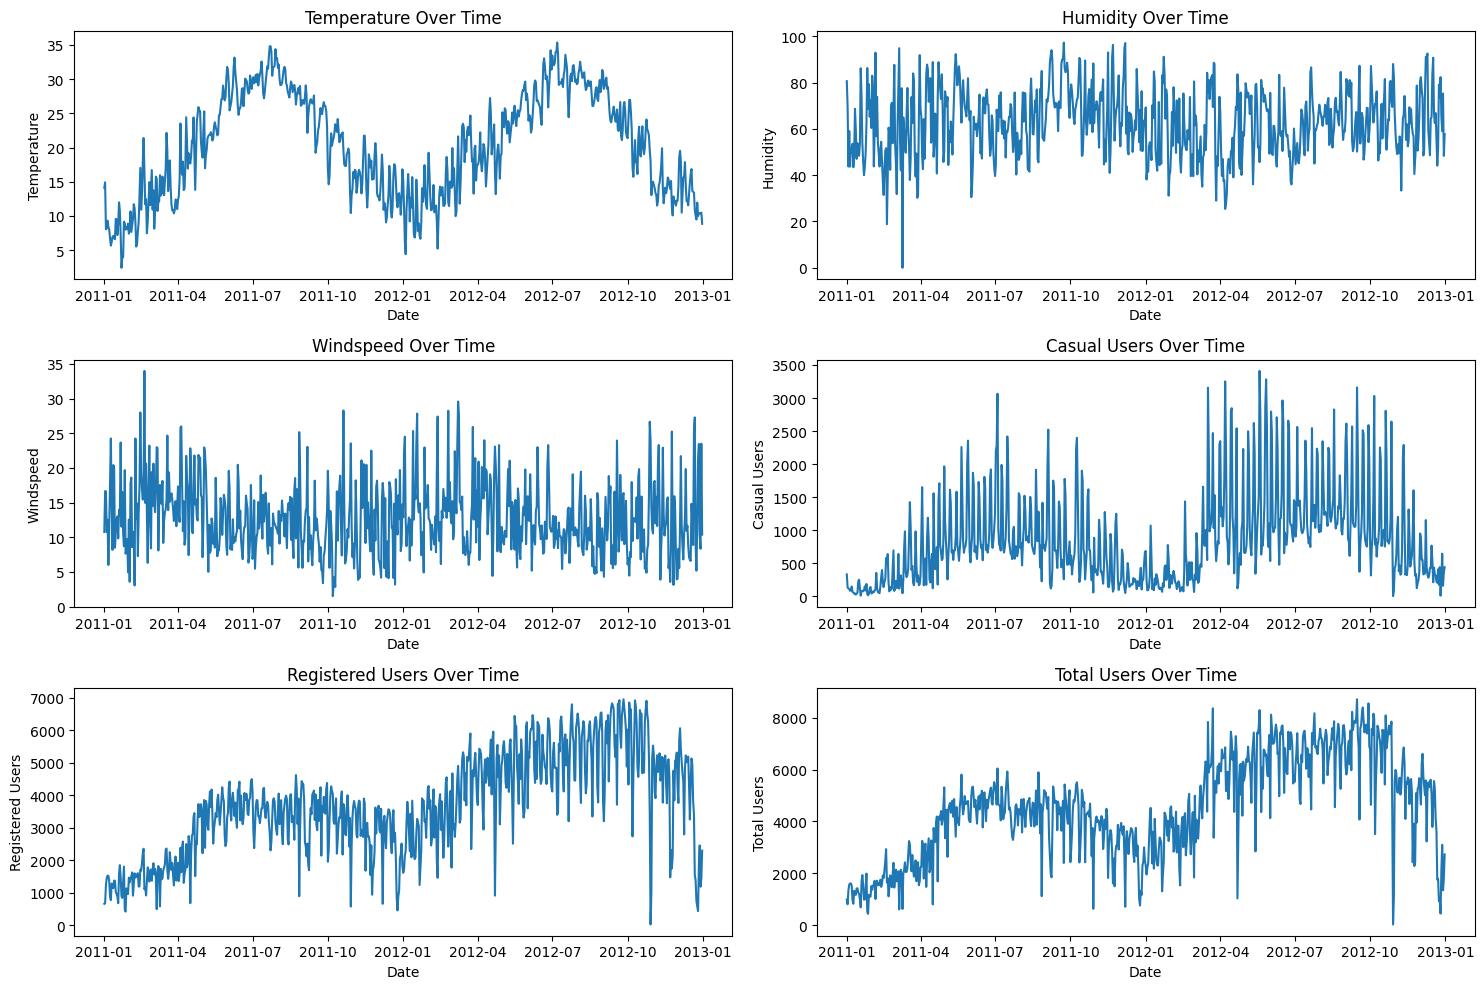

In [36]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.plot(day_df['dteday'], day_df['temp'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')

plt.subplot(3, 2, 2)
plt.plot(day_df['dteday'], day_df['hum'])
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity')

plt.subplot(3, 2, 3)
plt.plot(day_df['dteday'], day_df['windspeed'])
plt.title('Windspeed Over Time')
plt.xlabel('Date')
plt.ylabel('Windspeed')

plt.subplot(3, 2, 4)
plt.plot(day_df['dteday'], day_df['casual'])
plt.title('Casual Users Over Time')
plt.xlabel('Date')
plt.ylabel('Casual Users')

plt.subplot(3, 2, 5)
plt.plot(day_df['dteday'], day_df['registered'])
plt.title('Registered Users Over Time')
plt.xlabel('Date')
plt.ylabel('Registered Users')

plt.subplot(3, 2, 6)
plt.plot(day_df['dteday'], day_df['cnt'])
plt.title('Total Users Over Time')
plt.xlabel('Date')
plt.ylabel('Total Users')

plt.tight_layout()
plt.show()


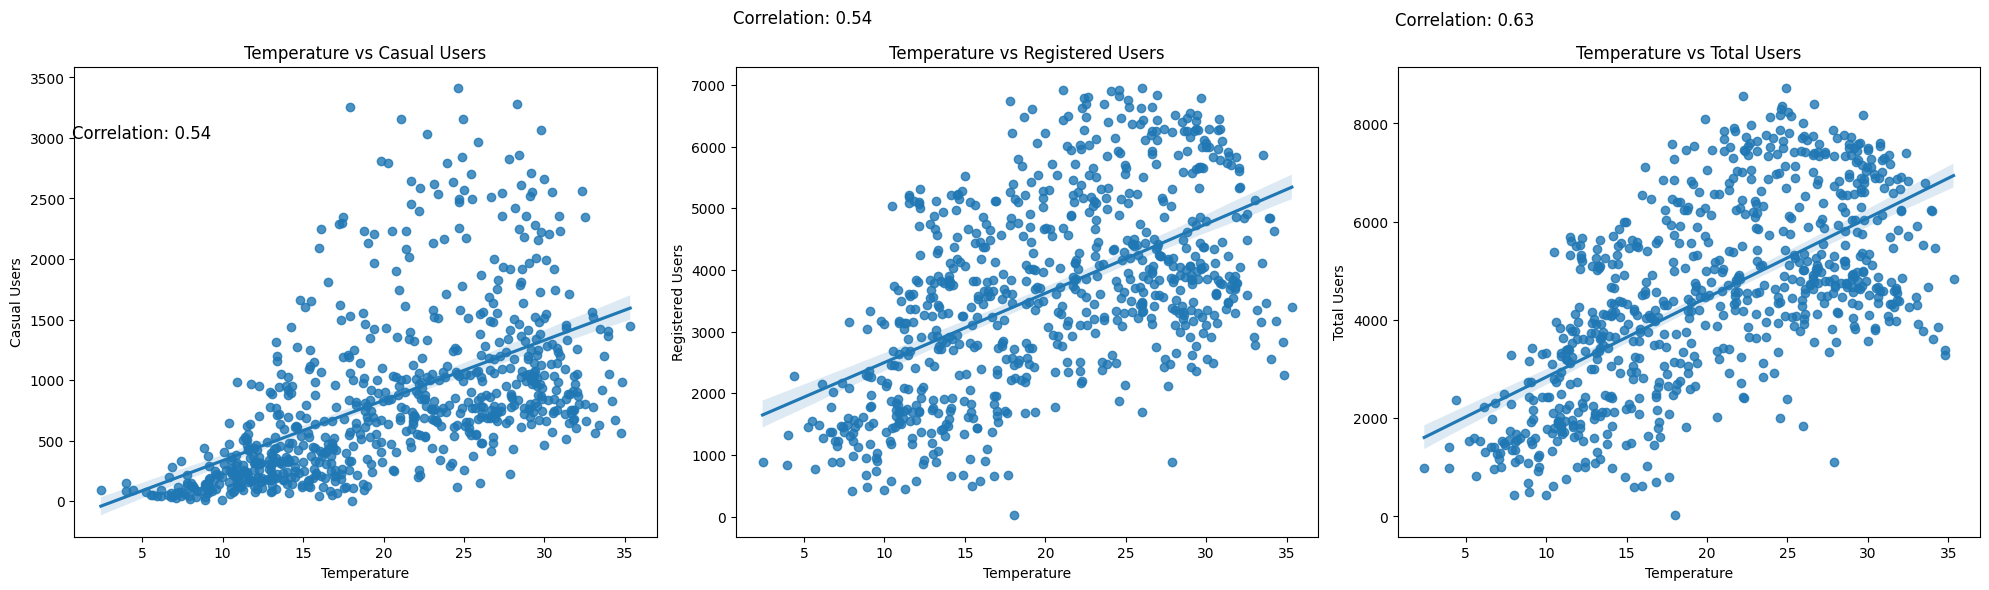

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.regplot(x='temp', y='casual', data=day_df, ax=axes[0])
axes[0].set_title('Temperature vs Casual Users')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Casual Users')
corr = day_df['temp'].corr(day_df['casual'])
axes[0].text(0.6, 3000, f'Correlation: {corr:.2f}', fontsize=12)

sns.regplot(x='temp', y='registered', data=day_df, ax=axes[1])
axes[1].set_title('Temperature vs Registered Users')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Registered Users')
corr = day_df['temp'].corr(day_df['registered'])
axes[1].text(0.6, 8000, f'Correlation: {corr:.2f}', fontsize=12)

sns.regplot(x='temp', y='cnt', data=day_df, ax=axes[2])
axes[2].set_title('Temperature vs Total Users')
axes[2].set_xlabel('Temperature')
axes[2].set_ylabel('Total Users')
corr = day_df['temp'].corr(day_df['cnt'])
axes[2].text(0.6, 10000, f'Correlation: {corr:.2f}', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-38-88b72d62c101>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_casual = day_df.groupby(temp_bins)['casual'].sum()
<ipython-input-38-88b72d62c101>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_registered = day_df.groupby(temp_bins)['registered'].sum()
<ipython-input-38-88b72d62c101>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_cnt = day_df.groupby(temp_bins)['cnt'].sum()


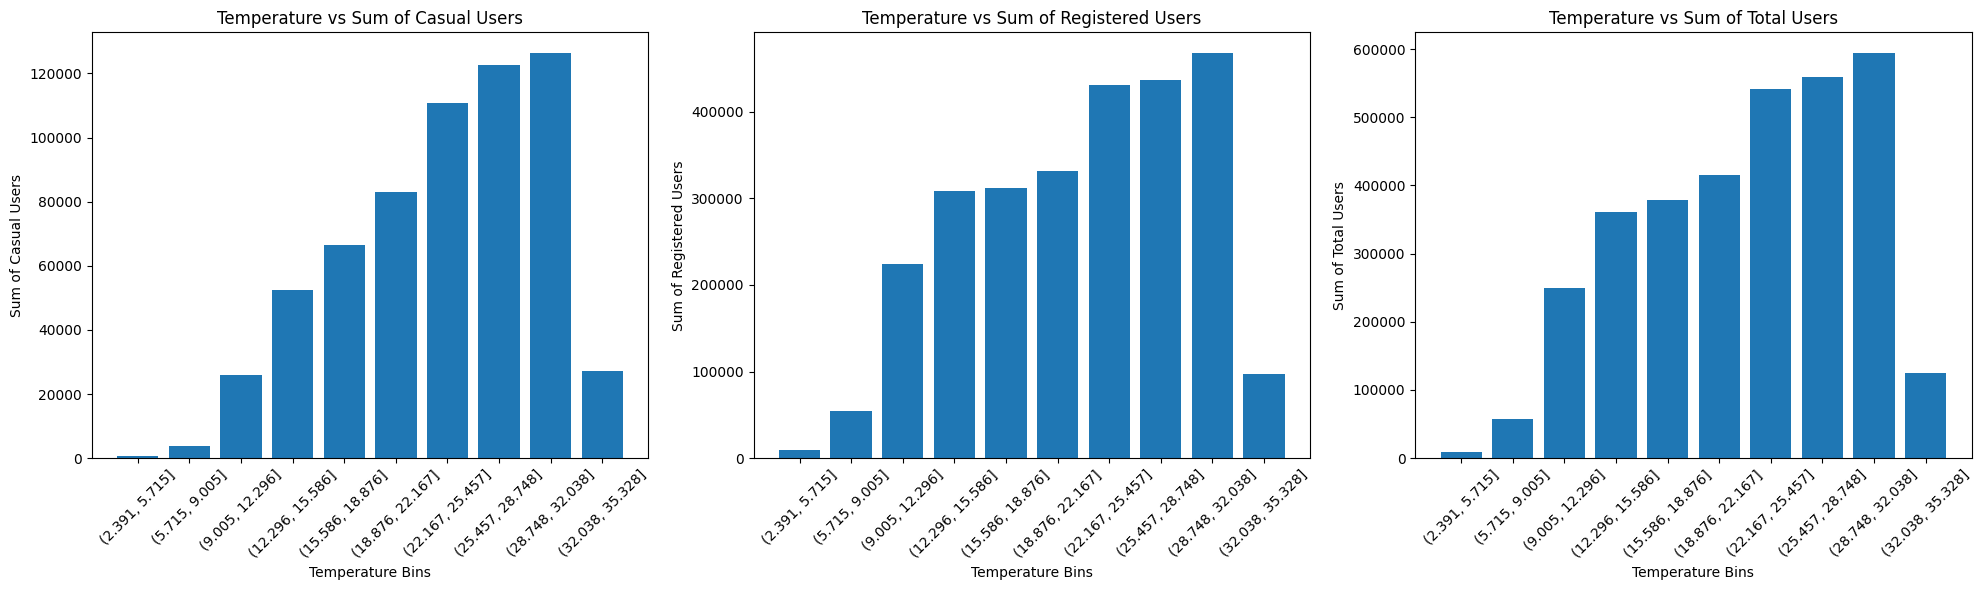

In [38]:
temp_bins = pd.cut(day_df['temp'], bins=10)
temp_casual = day_df.groupby(temp_bins)['casual'].sum()
temp_registered = day_df.groupby(temp_bins)['registered'].sum()
temp_cnt = day_df.groupby(temp_bins)['cnt'].sum()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].bar(temp_casual.index.astype(str), temp_casual.values)
axes[0].set_title('Temperature vs Sum of Casual Users')
axes[0].set_xlabel('Temperature Bins')
axes[0].set_ylabel('Sum of Casual Users')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(temp_registered.index.astype(str), temp_registered.values)
axes[1].set_title('Temperature vs Sum of Registered Users')
axes[1].set_xlabel('Temperature Bins')
axes[1].set_ylabel('Sum of Registered Users')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(temp_cnt.index.astype(str), temp_cnt.values)
axes[2].set_title('Temperature vs Sum of Total Users')
axes[2].set_xlabel('Temperature Bins')
axes[2].set_ylabel('Sum of Total Users')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

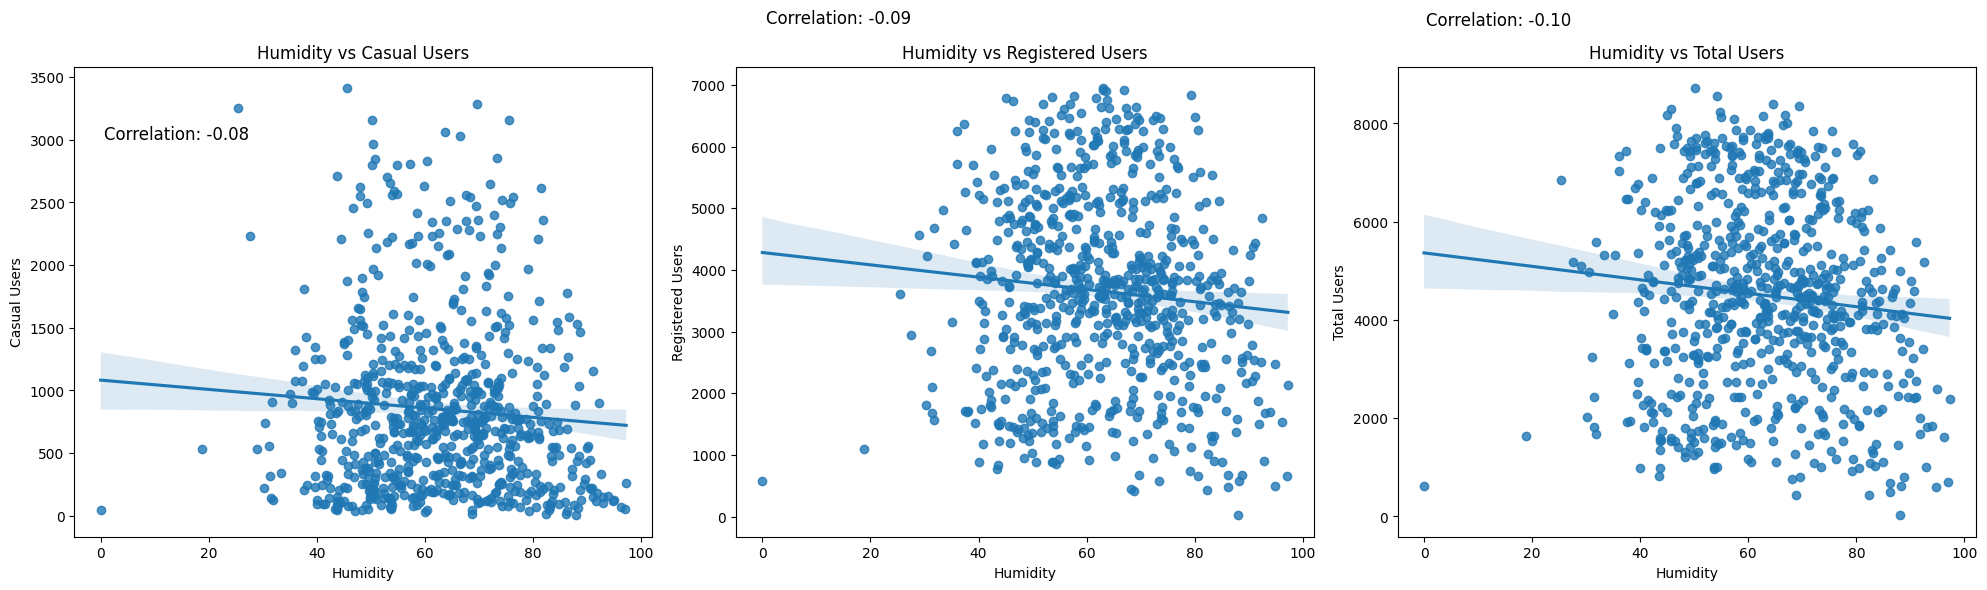

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.regplot(x='hum', y='casual', data=day_df, ax=axes[0])
axes[0].set_title('Humidity vs Casual Users')
axes[0].set_xlabel('Humidity')
axes[0].set_ylabel('Casual Users')
corr = day_df['hum'].corr(day_df['casual'])
axes[0].text(0.6, 3000, f'Correlation: {corr:.2f}', fontsize=12)

sns.regplot(x='hum', y='registered', data=day_df, ax=axes[1])
axes[1].set_title('Humidity vs Registered Users')
axes[1].set_xlabel('Humidity')
axes[1].set_ylabel('Registered Users')
corr = day_df['hum'].corr(day_df['registered'])
axes[1].text(0.6, 8000, f'Correlation: {corr:.2f}', fontsize=12)

sns.regplot(x='hum', y='cnt', data=day_df, ax=axes[2])
axes[2].set_title('Humidity vs Total Users')
axes[2].set_xlabel('Humidity')
axes[2].set_ylabel('Total Users')
corr = day_df['hum'].corr(day_df['cnt'])
axes[2].text(0.4, 10000, f'Correlation: {corr:.2f}', fontsize=12)

plt.tight_layout()
plt.show()

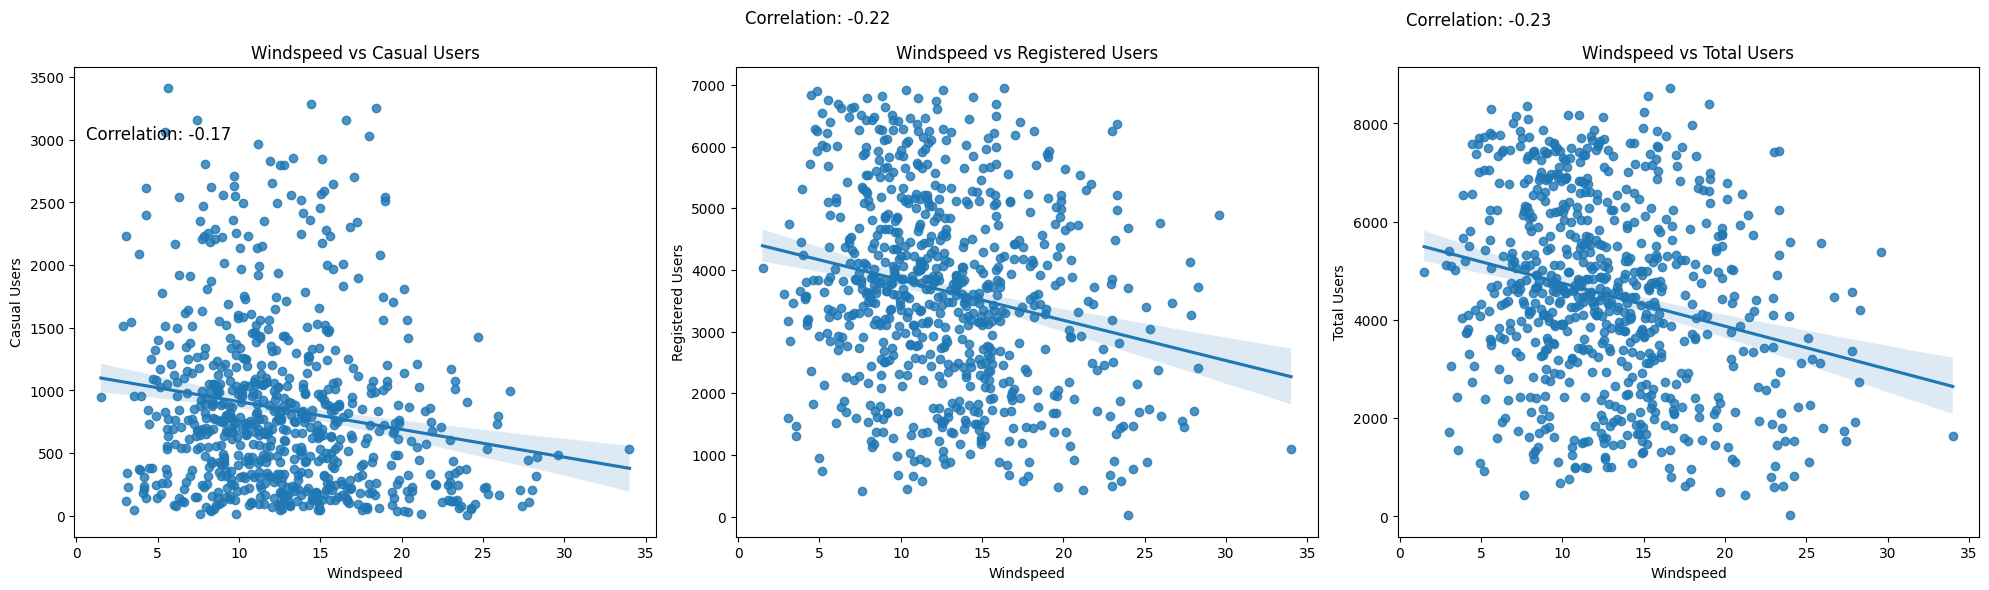

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.regplot(x='windspeed', y='casual', data=day_df, ax=axes[0])
axes[0].set_title('Windspeed vs Casual Users')
axes[0].set_xlabel('Windspeed')
axes[0].set_ylabel('Casual Users')
corr = day_df['windspeed'].corr(day_df['casual'])
axes[0].text(0.6, 3000, f'Correlation: {corr:.2f}', fontsize=12)

sns.regplot(x='windspeed', y='registered', data=day_df, ax=axes[1])
axes[1].set_title('Windspeed vs Registered Users')
axes[1].set_xlabel('Windspeed')
axes[1].set_ylabel('Registered Users')
corr = day_df['windspeed'].corr(day_df['registered'])
axes[1].text(0.4, 8000, f'Correlation: {corr:.2f}', fontsize=12)

sns.regplot(x='windspeed', y='cnt', data=day_df, ax=axes[2])
axes[2].set_title('Windspeed vs Total Users')
axes[2].set_xlabel('Windspeed')
axes[2].set_ylabel('Total Users')
corr = day_df['windspeed'].corr(day_df['cnt'])
axes[2].text(0.4, 10000, f'Correlation: {corr:.2f}', fontsize=12)

plt.tight_layout()
plt.show()

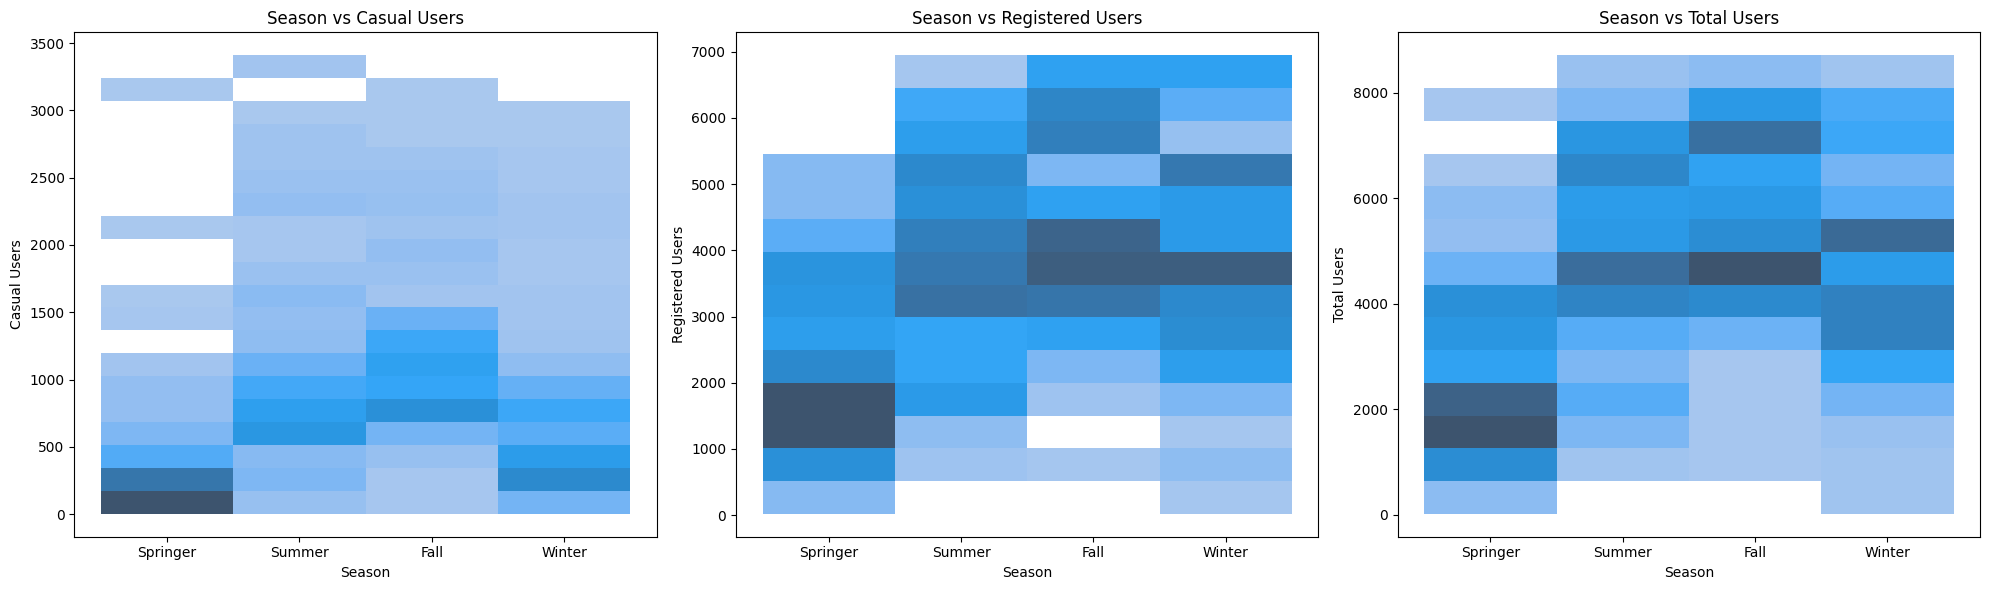

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(x='season', y='casual', data=day_df, ax=axes[0])
axes[0].set_title('Season vs Casual Users')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Casual Users')

sns.histplot(x='season', y='registered', data=day_df, ax=axes[1])
axes[1].set_title('Season vs Registered Users')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Registered Users')

sns.histplot(x='season', y='cnt', data=day_df, ax=axes[2])
axes[2].set_title('Season vs Total Users')
axes[2].set_xlabel('Season')
axes[2].set_ylabel('Total Users')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana jumlah pengguna sepeda pada 1 tahun tersebut, kebiasaan pengguna casual, registered, dan total?

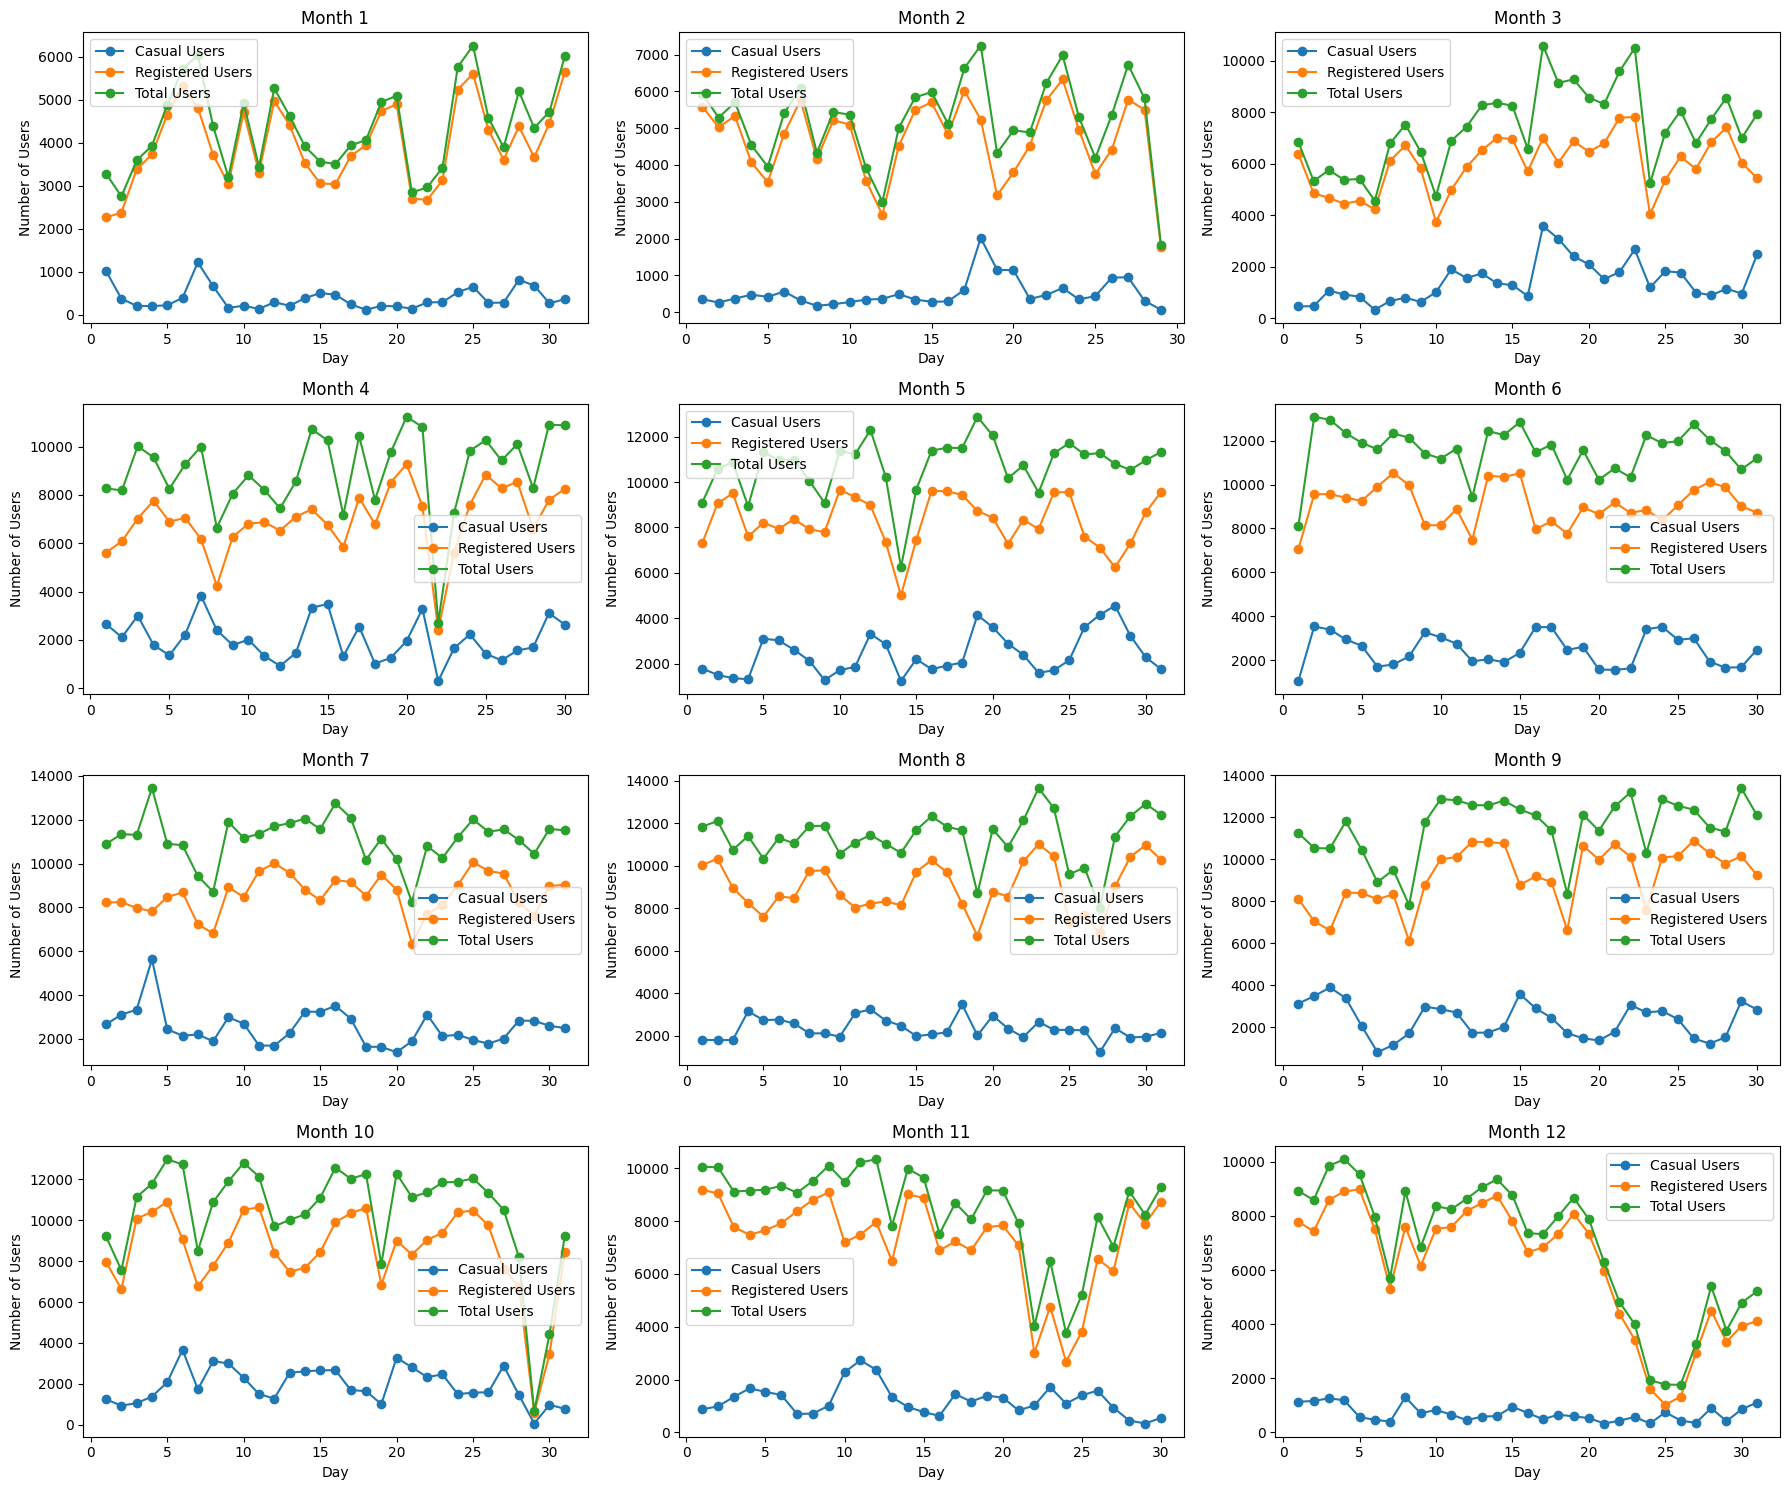

In [42]:
monthly_data = day_df.groupby(day_df['dteday'].dt.month)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for month, data in monthly_data:
    ax = axes[month-1]

    daily_casual = data.groupby(data['dteday'].dt.day)['casual'].sum()
    daily_registered = data.groupby(data['dteday'].dt.day)['registered'].sum()
    daily_cnt = data.groupby(data['dteday'].dt.day)['cnt'].sum()

    ax.plot(daily_casual.index, daily_casual.values, label='Casual Users', marker='o')
    ax.plot(daily_registered.index, daily_registered.values, label='Registered Users', marker='o')
    ax.plot(daily_cnt.index, daily_cnt.values, label='Total Users', marker='o')

    ax.set_title(f'Month {month}')
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Users')
    ax.legend()

for i in range(len(monthly_data), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

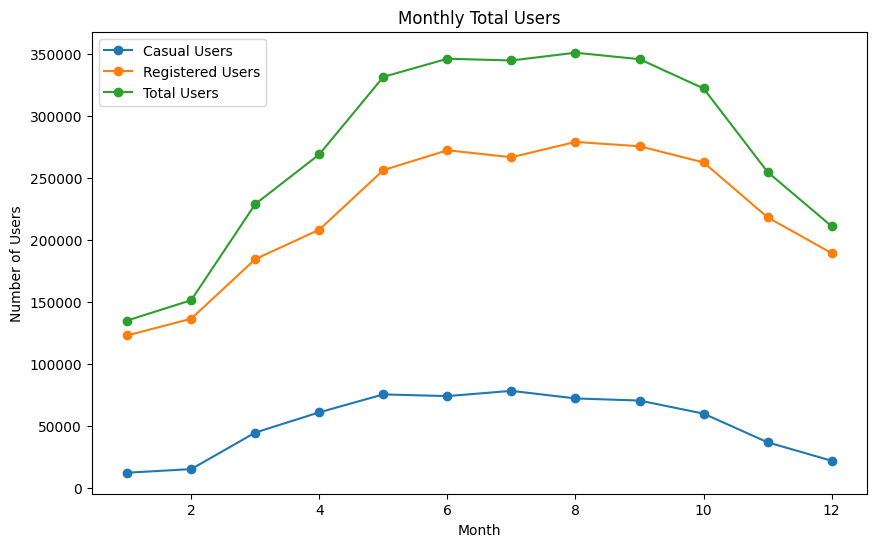

In [43]:
monthly_casual = day_df.groupby(day_df['dteday'].dt.month)['casual'].sum()
monthly_registered = day_df.groupby(day_df['dteday'].dt.month)['registered'].sum()
monthly_cnt = day_df.groupby(day_df['dteday'].dt.month)['cnt'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_casual.index, monthly_casual.values, label='Casual Users', marker='o')
plt.plot(monthly_registered.index, monthly_registered.values, label='Registered Users', marker='o')
plt.plot(monthly_cnt.index, monthly_cnt.values, label='Total Users', marker='o')

plt.title('Monthly Total Users')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.legend()

plt.show()

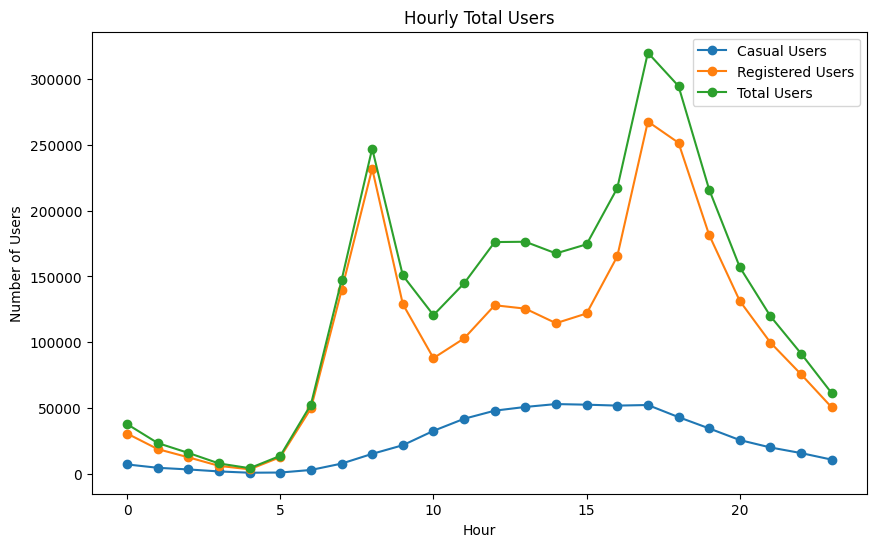

In [44]:
hourly_casual = hour_df.groupby('hr')['casual'].sum()
hourly_registered = hour_df.groupby('hr')['registered'].sum()
hourly_cnt = hour_df.groupby('hr')['cnt'].sum()

plt.figure(figsize=(10, 6))
plt.plot(hourly_casual.index, hourly_casual.values, label='Casual Users', marker='o')
plt.plot(hourly_registered.index, hourly_registered.values, label='Registered Users', marker='o')
plt.plot(hourly_cnt.index, hourly_cnt.values, label='Total Users', marker='o')

plt.title('Hourly Total Users')
plt.xlabel('Hour')
plt.ylabel('Number of Users')
plt.legend()

plt.show()

**Insight:**
- Pada pertanyaan pertama, dapat diperoleh bahwa holiday tidak meningkatkan jumlah usernya, bahkan ketika libur, jumlah average user setiap harinya malah berkurang.
-Kemudian untuk temperatur, ada korelasi di sekitar 0.5 - 0.6 an yang berarti bahwa meningkatnya suhu dapat berpengaruh pada peningkatan jumlah total users.
- Dapat terlihat juga bahwa kelembapan dan kecepatan angin bukan merupakan faktor yang memengaruhi jumlah user bike sharing ini.
- Pada musim juga terlihat jumlah terbanyak ada pada Fall, yang mungkin juga dipengaruhi oleh suhu yang cukup hangat.

$\,$

- Pada pertanyaan kedua, terlihat perilaku tiap pengguna mulai dari pengguna casual, registered dan total pada setiap bulannya. Terlihat ada beberapa poin pada graph yang menunjukan kenaikan pada garis casual dan total, sedangkan registered yang menurun. Ini berarti bahwa pengguna casual lebih tertarik pada waktu-waktu tersebut, hal ini lah yang dapat dimanfaatkan agar pada casual user dapat berubah menjadi registered users.
- Jika dilihat pada chart monthly, maka peak pengguna berada di pertengahan tahun, dan kemudian menurun seiring suhu yang mendingin
- Jika meninjau chart hourly, pengguna registered memiliki peak pada pukul 8 pagi dan 17 sore, yang menunjukan jam pergi dan pulang kerja. Sedangkan, pada casual user, tidak ada peak yang signifikan, hanya ada peningkatan di pertengahan hari dan kemudian menurun.

## Analisis Lanjutan (Opsional)

In [45]:
day_df.to_csv("day1.csv", index=False)
hour_df.to_csv("hour1.csv", index=False)

## Conclusion

- Ada faktor eksternal yang jelas memengaruhi jumlah pengguna, yaitu temperatur. Semakin tinggi temperatur, semakin banyak juga jumlah pengguna. Akan tetapi, jika temperatur yang terlalu tinggi, maka pengguna akan mulai berkurang. Walaupun ini merupakan faktor eksternal yang tidak dapat diatur, tetapi dapat diantisipasi dengan menambah jumlah sepeda ketika suhu mendukung untuk memaksimalkan revenue atau mengurangi sepeda ketika suhu tidak mendukung untuk mengurangi cost-cost.
- Terlihat bahwa ada beberapa hari dalam satu tahun dimana terjadi lonjakan casual users. Hal ini dapat dimanfaatkan untuk mengajak pada casual users agar dapat mendaftar dan menjadi registered users. Pada hourly chat juga terlihat peningkatan casual users di pertengahan hari, ini berarti promosi atau acara dapat dilaksanakan di pertengahan hari untuk menarik lebih banyak casual users dan nantinya semoga dapat menjadikannya menjadi registered users.